# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data processing

## Loading data

In [2]:
df = pd.read_csv("Video_Games.csv")
df.shape

(16719, 16)

In [3]:
#Check the type of the data
data_types = df.dtypes
data_types

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

## Dealing with missing values

In [4]:
# Check for missing values in each column
mis_values = df.isnull().sum()
# Filter out columns with no missing values
mis_values = mis_values[mis_values > 0]
mis_values

Name                  2
Year_of_Release     269
Genre                 2
Publisher            54
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
# Replace missing values with appropriate placeholders
df["Name"].fillna("Unknown", inplace=True)
df["Genre"].fillna("Unknown", inplace=True)
df["Publisher"].fillna("Unknown", inplace=True)
df["Developer"].fillna("Unknown", inplace=True)
df["Rating"].fillna("Not Rated", inplace=True)

# Making user_score column become numeric
df["User_Score"].replace("tbd", np.nan, inplace=True)
df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")

#Check again
df.isnull().sum()


Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer             0
Rating                0
dtype: int64

# Exploratory Data Analysis

## Summary statistic

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


## Distribution of games

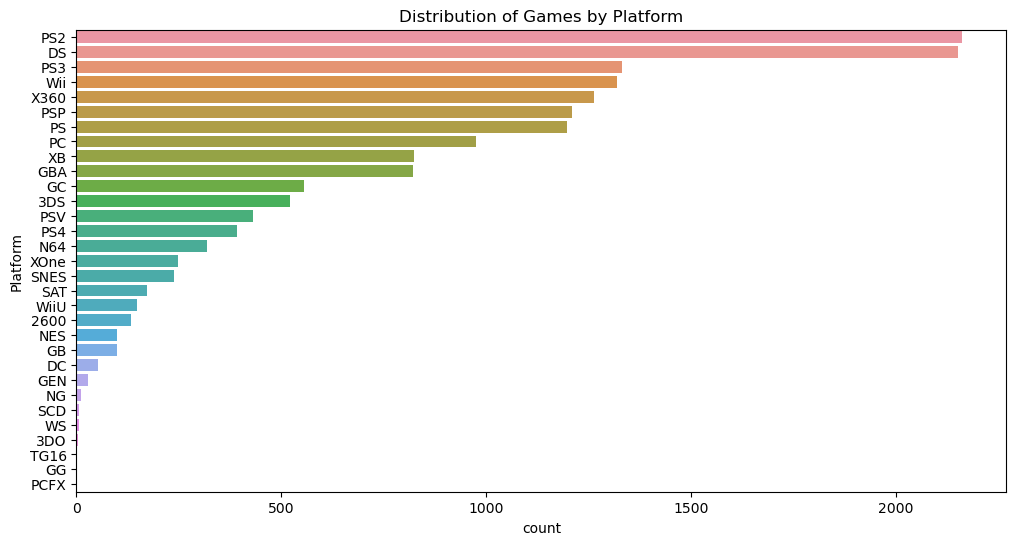

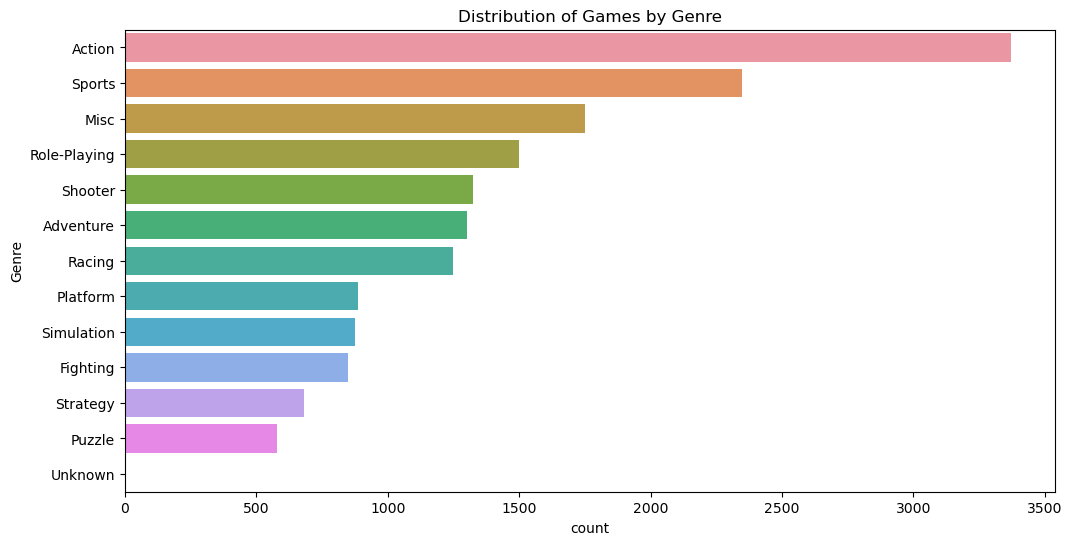

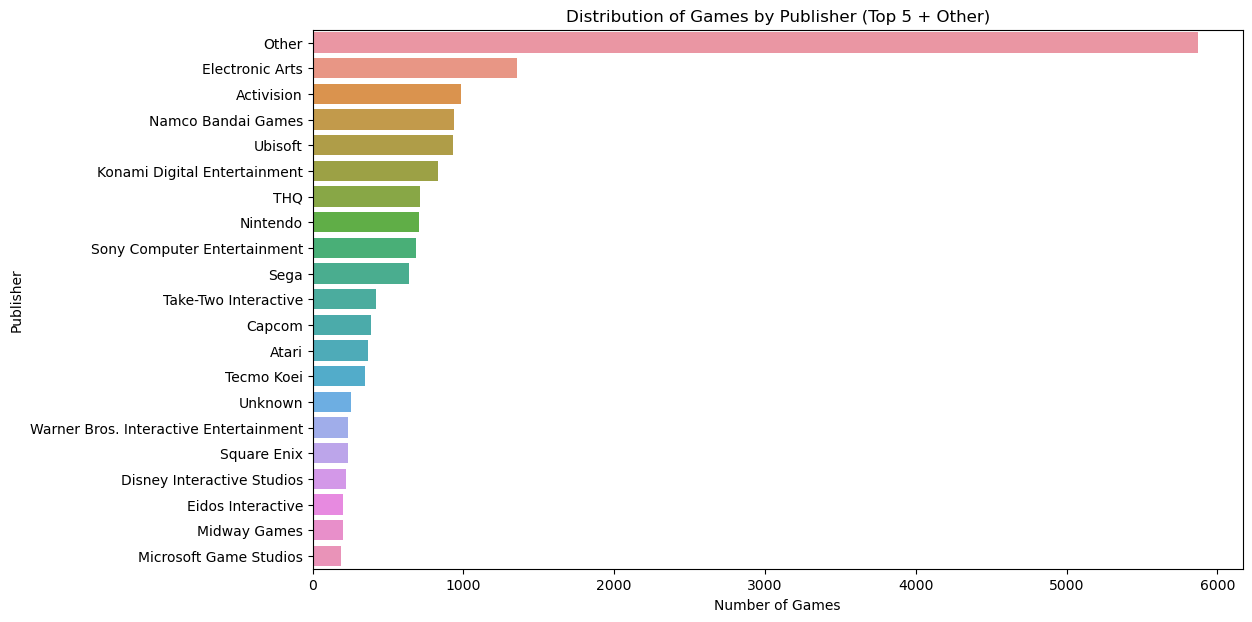

In [7]:
# Distribution by Platform
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Platform", order=df["Platform"].value_counts().index)
plt.title("Distribution of Games by Platform")
plt.show()

# Distribution by Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Genre", order=df["Genre"].value_counts().index)
plt.title("Distribution of Games by Genre")
plt.show()

# Distribution of publisher
top_five_publishers = df["Publisher"].value_counts().head(20).index
publisher_modified = df["Publisher"].apply(lambda x: x if x in top_five_publishers else "Other")
plt.figure(figsize=(12, 7))
sns.countplot(y=publisher_modified, order=publisher_modified.value_counts().index)
plt.title("Distribution of Games by Publisher (Top 5 + Other)")
plt.xlabel("Number of Games")
plt.ylabel("Publisher")
plt.show()



## Distribution of Sales

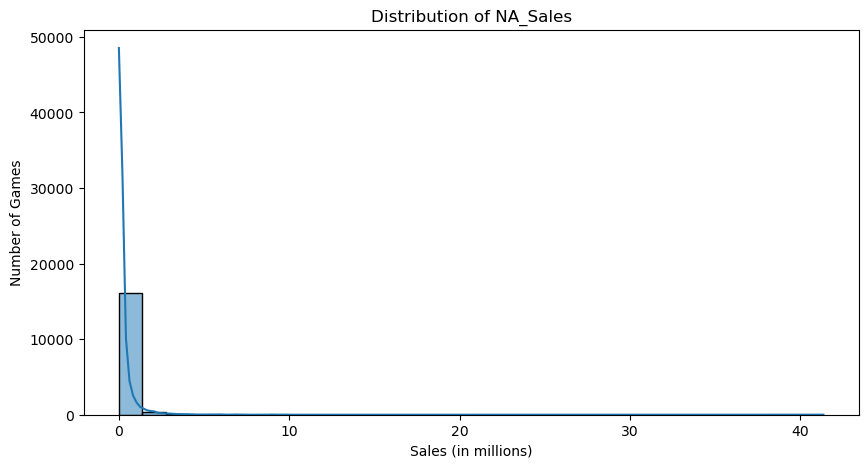

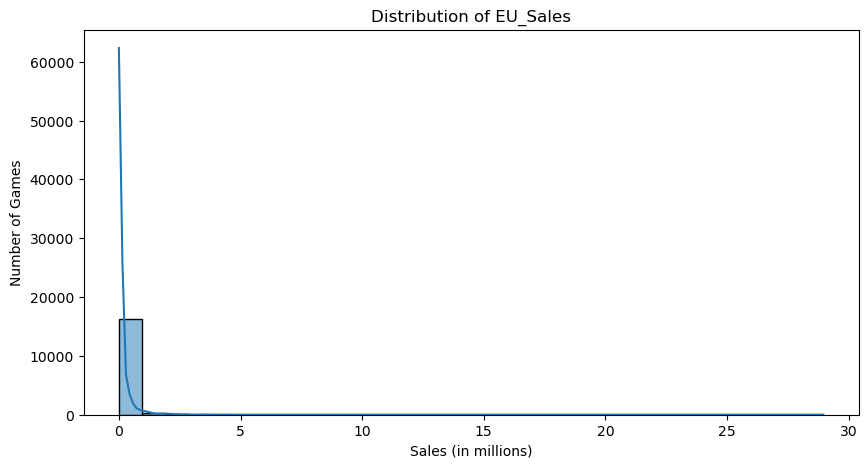

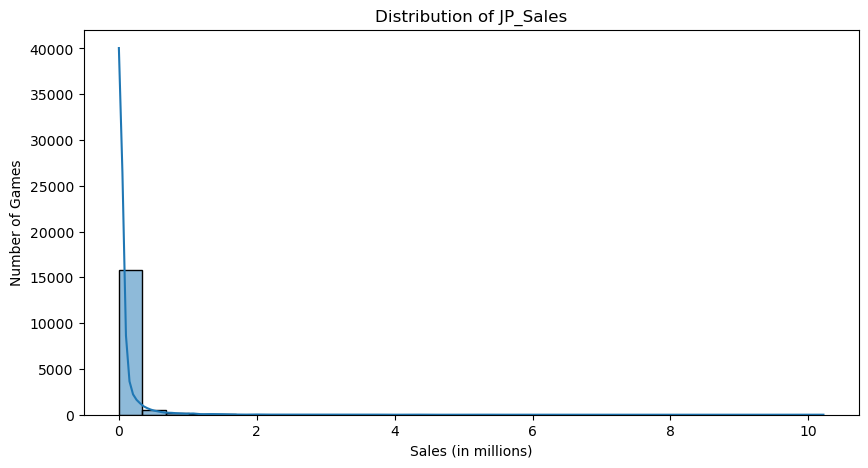

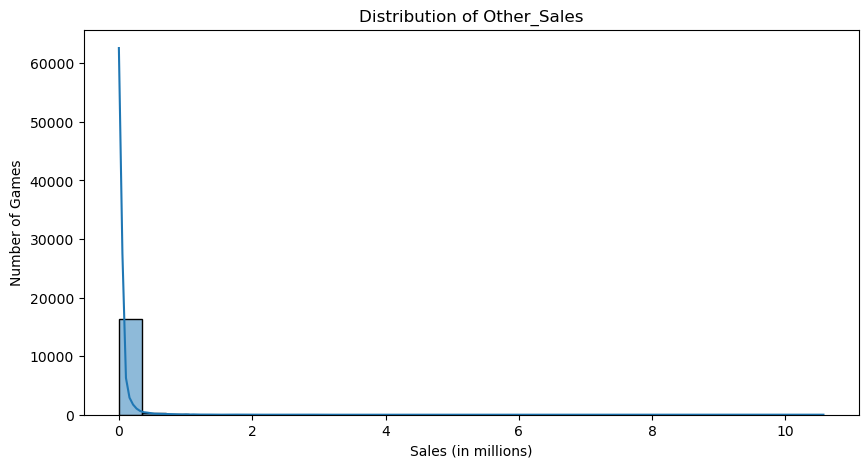

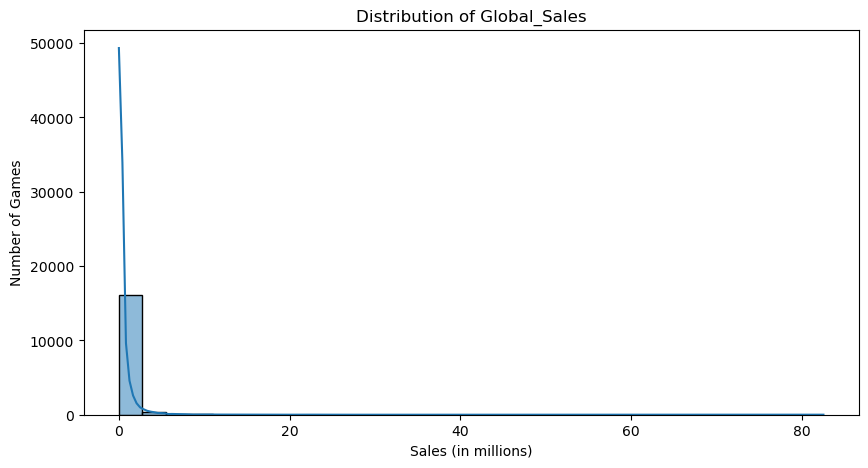

In [8]:
sales_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]


for column in sales_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Sales (in millions)")
    plt.ylabel("Number of Games")
    plt.show()


- All most Games have very low sales

## Trend over years

/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_41547/797710912.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_per_year = df.groupby("Year_of_Release").sum()["Global_Sales"]


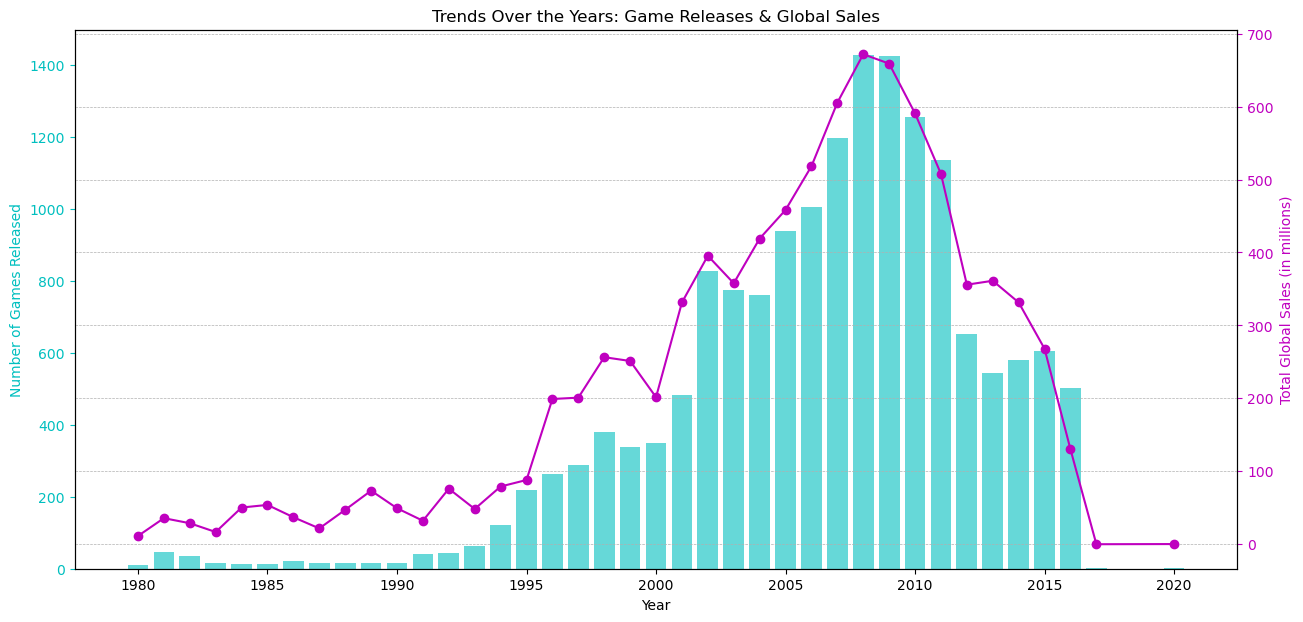

In [9]:
# Calculate number of games released each year
games_per_year = df.groupby("Year_of_Release").size()

# Calculate total global sales each year
sales_per_year = df.groupby("Year_of_Release").sum()["Global_Sales"]

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.bar(games_per_year.index, games_per_year, alpha=0.6, label="Number of Games Released", color="c")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Games Released", color="c")
ax1.tick_params("y", colors="c")

ax2 = ax1.twinx()
ax2.plot(sales_per_year.index, sales_per_year, color="m", marker="o", label="Total Global Sales")
ax2.set_ylabel("Total Global Sales (in millions)", color="m")
ax2.tick_params("y", colors="m")

plt.title("Trends Over the Years: Game Releases & Global Sales")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## Score Distributions

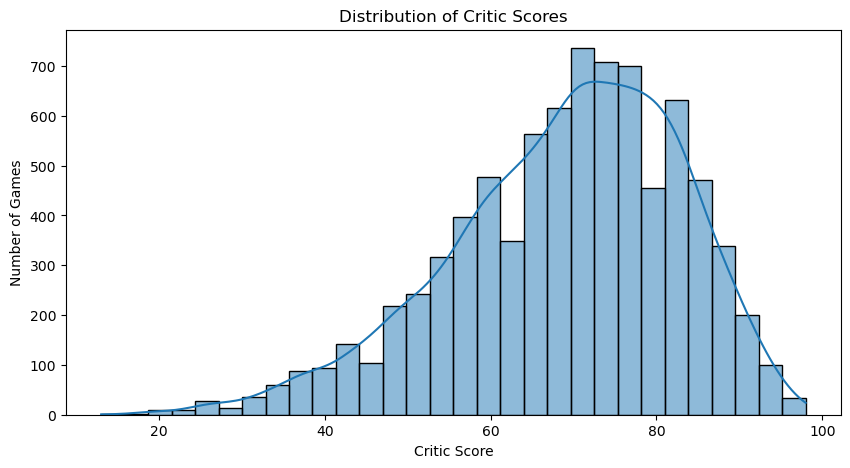

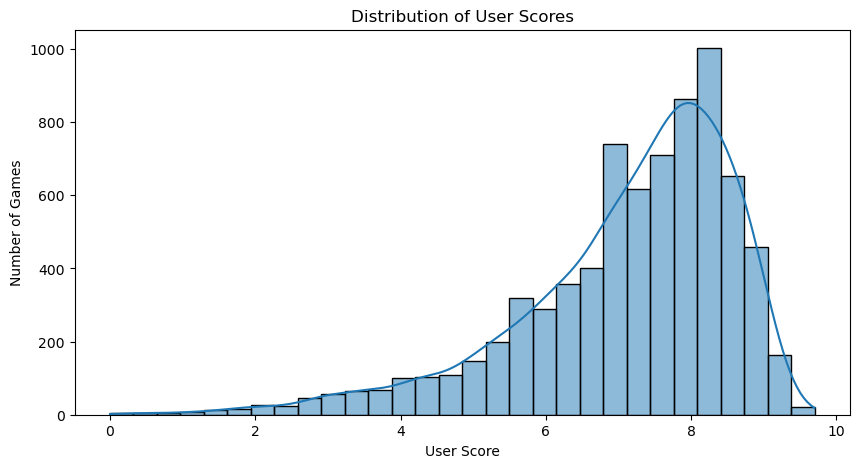

In [10]:
# Critic Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Critic_Score"].dropna(), kde=True, bins=30)
plt.title("Distribution of Critic Scores")
plt.xlabel("Critic Score")
plt.ylabel("Number of Games")
plt.show()

# User Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["User_Score"].dropna(), kde=True, bins=30)
plt.title("Distribution of User Scores")
plt.xlabel("User Score")
plt.ylabel("Number of Games")
plt.show()

# In-depth Analysis

## Games with the Highest Sales

In [11]:
global_sales = df[["Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(10)
global_sales = pd.DataFrame(global_sales).set_index("Name")
print(global_sales)

                           Global_Sales
Name                                   
Wii Sports                        82.53
Super Mario Bros.                 40.24
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Tetris                            30.26
New Super Mario Bros.             29.80
Wii Play                          28.92
New Super Mario Bros. Wii         28.32
Duck Hunt                         28.31


In [12]:
eu_top = df[["Name", "EU_Sales"]].sort_values(by="EU_Sales", ascending=False).head(10)
eu_top = pd.DataFrame(eu_top).set_index("Name")
print(eu_top)


                                              EU_Sales
Name                                                  
Wii Sports                                       28.96
Mario Kart Wii                                   12.76
Nintendogs                                       10.95
Wii Sports Resort                                10.93
Brain Age: Train Your Brain in Minutes a Day      9.20
Wii Play                                          9.18
New Super Mario Bros.                             9.14
Grand Theft Auto V                                9.09
Pokemon Red/Pokemon Blue                          8.89
Wii Fit Plus                                      8.49


In [13]:
jp_top = df[["Name", "JP_Sales"]].sort_values(by="JP_Sales", ascending=False).head(10)
jp_top = pd.DataFrame(jp_top).set_index("Name")
print(jp_top)


                                             JP_Sales
Name                                                 
Pokemon Red/Pokemon Blue                        10.22
Pokemon Gold/Pokemon Silver                      7.20
Super Mario Bros.                                6.81
New Super Mario Bros.                            6.50
Pokemon Diamond/Pokemon Pearl                    6.04
Pokemon Black/Pokemon White                      5.65
Pokemon Ruby/Pokemon Sapphire                    5.38
Animal Crossing: Wild World                      5.33
Brain Age 2: More Training in Minutes a Day      5.32
Monster Hunter Freedom 3                         4.87


## Top publishers and developers

In [14]:
# Top 10 publishers by number of Games
top_publishers_games = df["Publisher"].value_counts().head(10)
top_publishers_games = pd.DataFrame(top_publishers_games)
top_publishers_games.columns = ["Number of Games"]
print(top_publishers_games)


                              Number of Games
Electronic Arts                          1356
Activision                                985
Namco Bandai Games                        939
Ubisoft                                   933
Konami Digital Entertainment              834
THQ                                       715
Nintendo                                  706
Sony Computer Entertainment               687
Sega                                      638
Take-Two Interactive                      422


In [15]:
# Top 10 publishers by Sales
top_publishers_sales = df.groupby("Publisher").sum()["Global_Sales"].sort_values(ascending=False).head(10)
top_publishers_sales = pd.DataFrame(top_publishers_sales)
top_publishers_sales.columns = ["Sales"]
print(top_publishers_sales)


                                Sales
Publisher                            
Nintendo                      1788.81
Electronic Arts               1116.96
Activision                     731.16
Sony Computer Entertainment    606.48
Ubisoft                        471.61
Take-Two Interactive           403.82
THQ                            338.44
Konami Digital Entertainment   282.39
Sega                           270.35
Namco Bandai Games             254.62


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_41547/954657903.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_publishers_sales = df.groupby("Publisher").sum()["Global_Sales"].sort_values(ascending=False).head(10)


In [16]:
# Top 10 Developers by number of Games
top_developers_games = df["Developer"].sort_values(ascending=False).value_counts().head(10)
top_developers_games = pd.DataFrame(top_developers_games)
top_developers_games.columns = ["Number of Games"]
print(top_developers_games[1:11])

                  Number of Games
Ubisoft                       204
EA Sports                     172
EA Canada                     167
Konami                        162
Capcom                        139
EA Tiburon                    108
Electronic Arts               104
Ubisoft Montreal              101
Visual Concepts                99


In [17]:
# Top 10 Developers by Sales
top_developers_sales = df.groupby("Developer").sum()["Global_Sales"].sort_values(ascending=False).head(10)
top_developers_sales = pd.DataFrame(top_developers_sales)
top_developers_sales.columns = ["Sales"]
print(top_developers_sales[1:11])


                   Sales
Developer               
Nintendo          531.71
EA Sports         175.38
EA Canada         142.32
Ubisoft           132.54
Rockstar North    119.47
Capcom            115.71
Ubisoft Montreal  108.31
Treyarch          103.16
EA Tiburon         96.12


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_41547/2715957037.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_developers_sales = df.groupby("Developer").sum()["Global_Sales"].sort_values(ascending=False).head(10)


## Platform Analysis

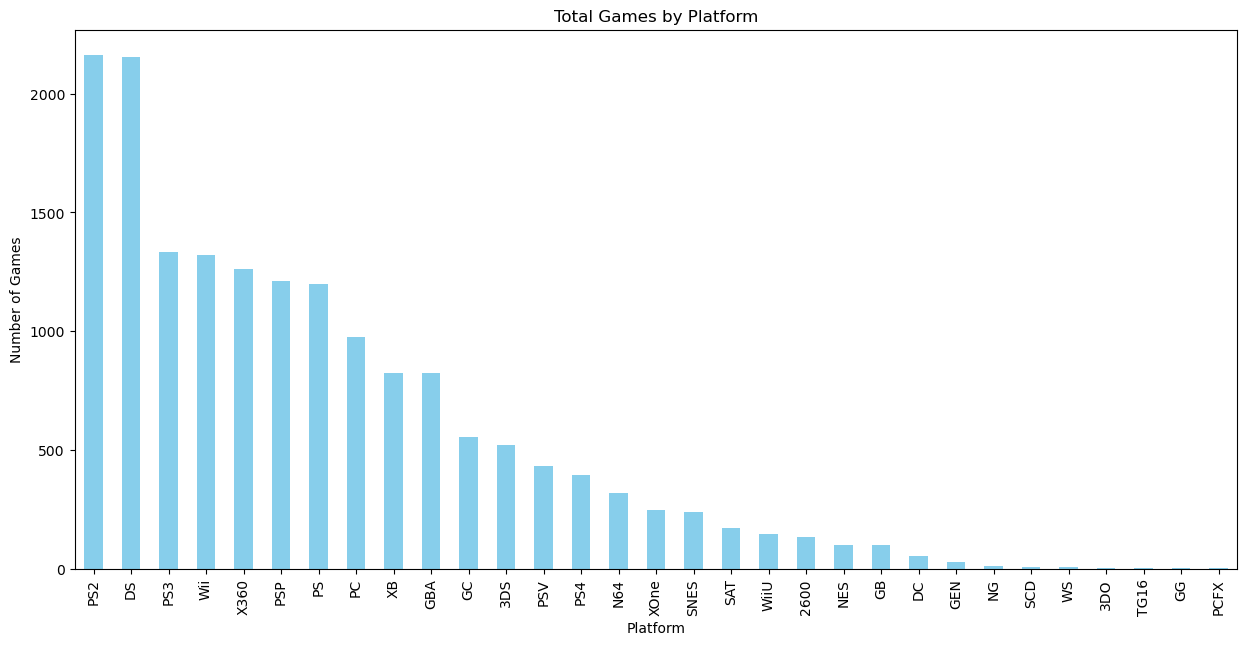

In [18]:
#Total Games by platform
top_platforms_games = df["Platform"].value_counts()
plt.figure(figsize=(15, 7))
top_platforms_games.plot(kind="bar", color="skyblue")
plt.title("Total Games by Platform")
plt.ylabel("Number of Games")
plt.xlabel("Platform")
plt.show()


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_41547/3386002839.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  platform_sales = df.groupby("Platform").sum()["Global_Sales"].sort_values(ascending=False)


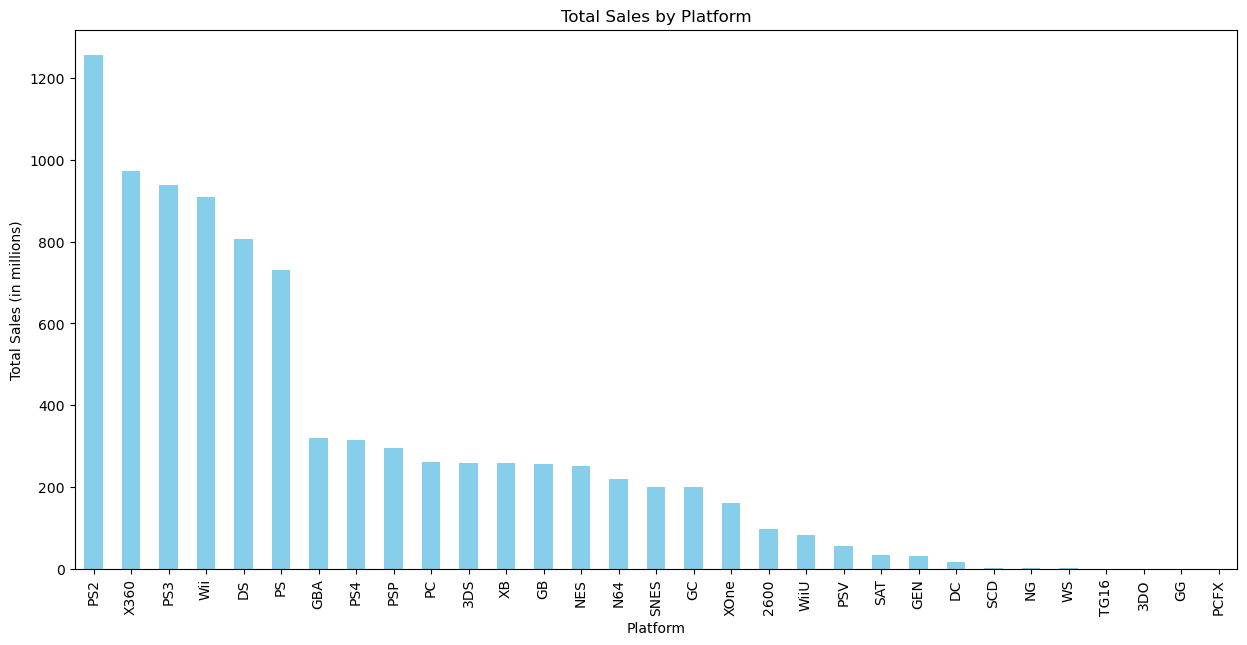

In [19]:
#Total sales by platform
platform_sales = df.groupby("Platform").sum()["Global_Sales"].sort_values(ascending=False)
plt.figure(figsize=(15, 7))
platform_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Platform")
plt.ylabel("Total Sales (in millions)")
plt.xlabel("Platform")
plt.show()


## Genre Analysis

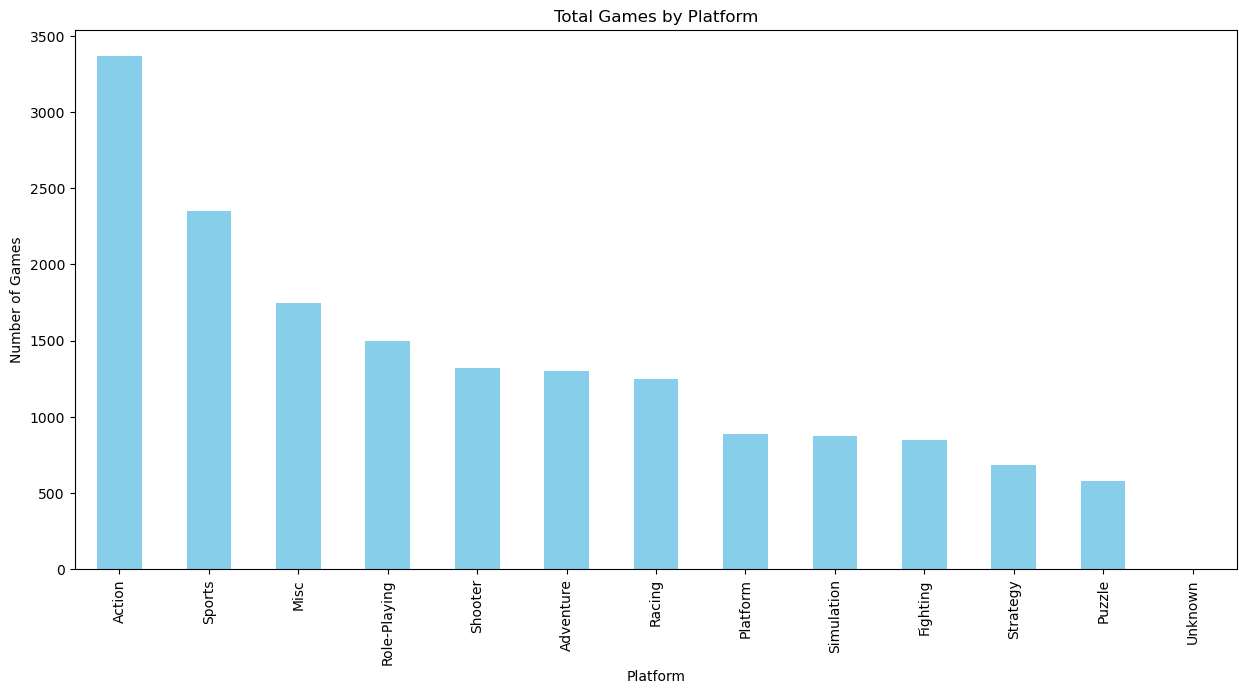

In [20]:
#Total games by genre
top_genres_games = df["Genre"].value_counts()
plt.figure(figsize=(15, 7))
top_genres_games.plot(kind="bar", color="skyblue")
plt.title("Total Games by Platform")
plt.ylabel("Number of Games")
plt.xlabel("Platform")
plt.show()


/var/folders/y6/182wld891cn8s93gftsfv4nr0000gn/T/ipykernel_41547/296144662.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_sales = df.groupby("Genre").sum()["Global_Sales"].sort_values(ascending=False)


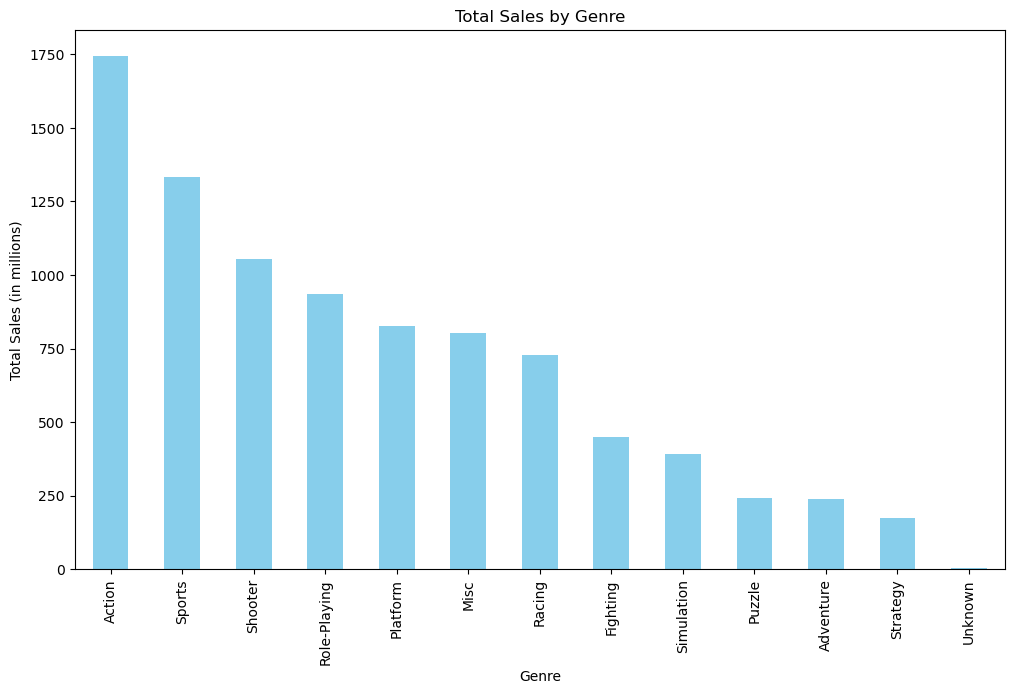

In [21]:
#Total sales by genre
genre_sales = df.groupby("Genre").sum()["Global_Sales"].sort_values(ascending=False)
plt.figure(figsize=(12, 7))
genre_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Genre")
plt.ylabel("Total Sales (in millions)")
plt.xlabel("Genre")
plt.show()

# Hypothesis testing

## Genre and Sales

- Hypothesis: Certain genres generate significantly different sales than others.
- Null Hypothesis: There is no difference in sales between genres.
- Alternative Hypothesis: There is a significant difference in sales between genres.

In [22]:
import scipy.stats as stats
# ANOVA test
groups = [df["Global_Sales"][df["Genre"] == genre] for genre in df["Genre"].unique() if genre != "Unknown"]
f_value, p_value = stats.f_oneway(*groups)

print(f"Genre and Global Sales: F-value = {f_value}, P-value = {p_value}")

Genre and Global Sales: F-value = 18.747384734633812, P-value = 6.770686930729133e-38


## Critic Score and Global Sales

- Hypothesis: Games with higher critic scores have higher sales.
- Null Hypothesis: Critic scores have no effect on sales.
- Alternative Hypothesis: Games with higher critic scores generate higher sales.

In [23]:
# Pearson correlation test
correlation_critic, p_value_critic = stats.pearsonr(df["Critic_Score"].dropna(), df["Global_Sales"][df["Critic_Score"].notnull()])
print(f"Critic Score vs Global Sales: Correlation = {correlation_critic}, P-value = {p_value_critic}")


Critic Score vs Global Sales: Correlation = 0.24547067750675577, P-value = 5.923614898988687e-112


=> The extremely low p-value provides strong evidence against the null hypothesis. In addition, the positive correlation of 
0.2455 suggests a moderate positive linear relationship.

##  User Score and Global Sales

- Hypothesis: Games with higher user scores have higher sales.
- Null Hypothesis: User scores have no effect on sales.
- Alternative Hypothesis: Games with higher user scores generate higher sales.

In [24]:
# Pearson correlation test
correlation_user, p_value_user = stats.pearsonr(df["User_Score"].dropna(), df["Global_Sales"][df["User_Score"].notnull()])
print(f"User Score vs Global Sales: Correlation = {correlation_user}, P-value = {p_value_user}")


User Score vs Global Sales: Correlation = 0.08813917279231012, P-value = 1.443469235173175e-14


=> The extremely low p-value provides strong evidence against the null hypothesis. In addition, the positive correlation of 
0.0881 suggests a weak positive linear relationship.

## Different ratings and their global sales

- Hypothesis: Games with certain ratings generate significantly different sales than games with other ratings.
- Null Hypothesis: There is no difference in sales between different game ratings.
- Alternative Hypothesis: There is a significant difference in sales between different game ratings.

In [25]:
# ANOVA test
f_value_rating, p_value_rating = stats.f_oneway(*[df["Global_Sales"][df["Rating"] == rating] for rating in df["Rating"].unique() if rating != "Not Rated"])
print(f"Ratings and Global sales: F-value = {f_value_rating}, P-value = {p_value_rating}")


Ratings and Global sales: F-value = 12.693774482641237, P-value = 2.5330189802829004e-16


=> The high F-value and the extremely low p-value, which provide very strong evidence against the null hypothesis.